In [78]:
#Importing All Required Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
#Loading Datasets
pd.set_option('display.max_columns',10,'display.width',1000)
train = pd.read_csv("C:/Users/Lenovo/Desktop/prodigy_inter/ts2/titanic/train.csv")
test = pd.read_csv("C:/Users/Lenovo/Desktop/prodigy_inter/ts2/titanic/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,...,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,...,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,...,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,...,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,...,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,...,0,373450,8.0500,NaN,S


In [80]:
train.shape

(891, 12)

In [81]:
test.shape

(418, 11)

In [82]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [83]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [86]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [105]:
test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,...,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,...,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,...,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,...,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,...,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,...,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,...,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,...,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,...,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,...,0.000000,NaN,31.500000,NaN,NaN


In [111]:
female_ind = len(train[train['Sex'] == 'female'])
print("No of Females in Titanic:",female_ind)

No of Females in Titanic: 314


In [108]:
male_ind = len(train[train['Sex'] == 'male'])
print("No of Males in Titanic:",male_ind)

No of Males in Titanic: 577


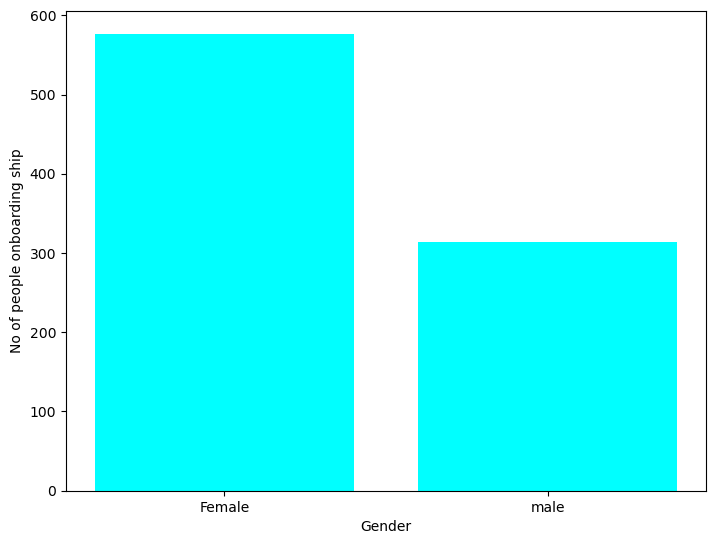

In [145]:
#Plotting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Female','male']
index = [577,314]
ax.bar(gender,index,color='cyan')
plt.xlabel("Gender")
plt.ylabel("No of people onboarding ship")
plt.show()

In [124]:
alive = len(train[train['Survived'] == 1])
dead = len(train[train['Survived'] == 0])

In [125]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


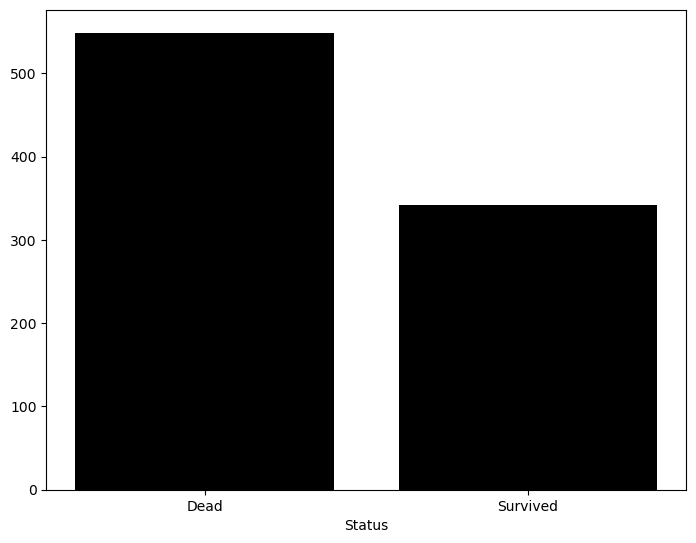

In [139]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['Dead','Survived']
ind = [dead,alive]
ax.bar(status,ind,color='Black')
plt.xlabel("Status")
plt.show()

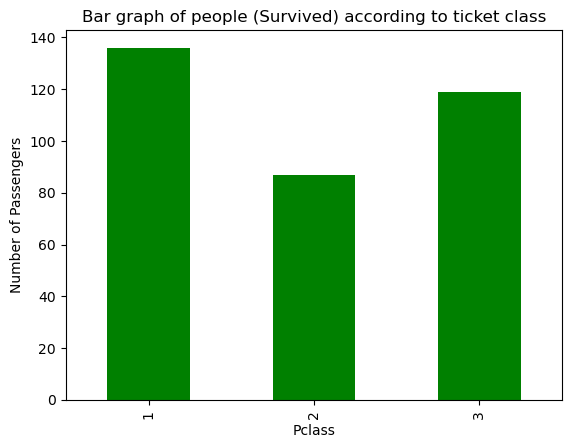

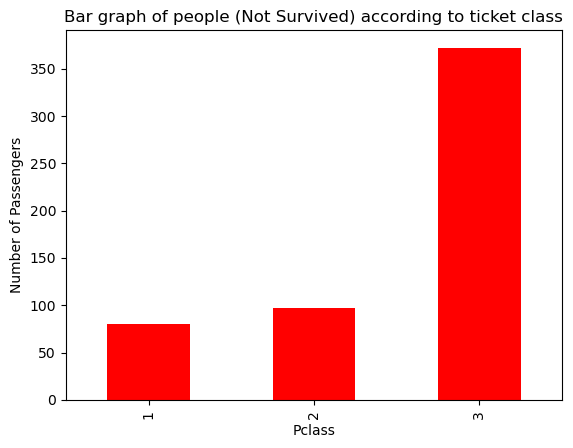

In [141]:
# Create separate figures for each plot
plt.figure(1)
survived_train = train.loc[train['Survived'] == 1, 'Pclass'].value_counts().sort_index()
survived_train.plot.bar(color='green')  # Set green color for survived passengers
plt.title('Bar graph of people (Survived) according to ticket class')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')

plt.figure(2)
deceased_train = train.loc[train['Survived'] == 0, 'Pclass'].value_counts().sort_index()
deceased_train.plot.bar(color='red')  # Set red color for deceased passengers
plt.title('Bar graph of people (Not Survived) according to ticket class')
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')

plt.show()


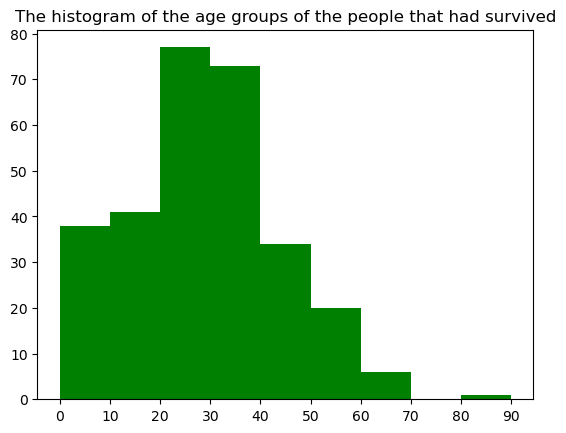

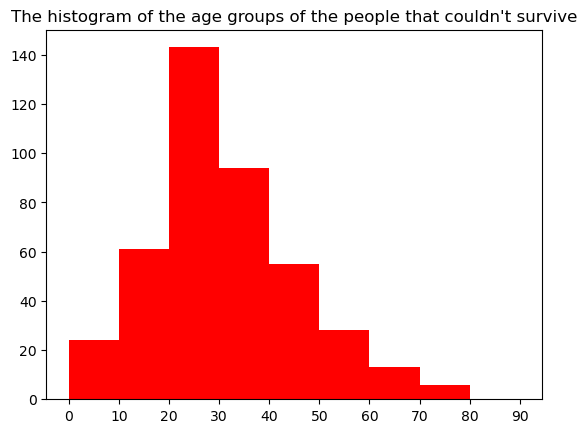

In [147]:
import matplotlib.pyplot as plt
import numpy as np

# ... (rest of your code)

plt.figure(1)
age_survived = train.loc[train.Survived == 1, 'Age']
plt.title('The histogram of the age groups of the people that had survived')
plt.hist(age_survived, np.arange(0, 100, 10), color='green')  # Set color to green
plt.xticks(np.arange(0, 100, 10))

plt.figure(2)
age_deceased = train.loc[train.Survived == 0, 'Age']
plt.title('The histogram of the age groups of the people that couldn\'t survive')
plt.hist(age_deceased, np.arange(0, 100, 10), color='red')  # Set color to red
plt.xticks(np.arange(0, 100, 10))

plt.show()


In [148]:
train[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=True)

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


In [149]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [150]:
train[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


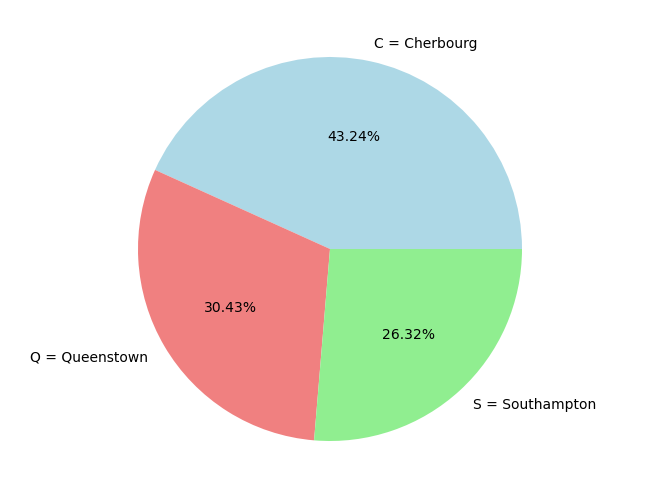

In [151]:
import matplotlib.pyplot as plt

# Define colors for each slice
colors = ['lightblue', 'lightcoral', 'lightgreen']

# ... (rest of your code)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')  # Equal aspect ratio for a circular pie chart

l = ['C = Cherbourg', 'Q = Queenstown', 'S = Southampton']
s = [0.553571, 0.389610, 0.336957]

# Pass the 'colors' list as an argument to ax.pie()
ax.pie(s, labels=l, autopct='%1.2f%%', colors=colors)
plt.show()


In [152]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,...,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,...,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,...,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,...,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,...,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,...,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,...,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,...,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,...,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,...,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,...,0.000000,NaN,31.500000,NaN,NaN


In [153]:
#Deleting Useless Columns
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [154]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [155]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [156]:
#Feature Selection
column_train=['Age','Pclass','SibSp','Parch','Fare','Sex','Embarked']
#training values
X=train[column_train]
#target value
Y=train['Survived']

In [157]:
X['Age'].isnull().sum()
X['Pclass'].isnull().sum()
X['SibSp'].isnull().sum()
X['Parch'].isnull().sum()
X['Fare'].isnull().sum()
X['Sex'].isnull().sum()
X['Embarked'].isnull().sum()

2

In [161]:
X['Age']=X['Age'].fillna(X['Age'].median())
X['Age'].isnull().sum()

0

In [162]:
X['Embarked'] = train['Embarked'].fillna(method ='pad')
X['Embarked'].isnull().sum()

0

In [163]:
d={'male':0, 'female':1}
X['Sex']=X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [167]:
e={'C':0, 'Q':1 ,'S':2}
X['Embarked']=X['Embarked'].apply(lambda x:e[x])
X['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

In [168]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [169]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7611940298507462


In [170]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[131  25]
 [ 39  73]]


In [171]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred4))

Accuracy Score: 0.7425373134328358


In [172]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred4)
print(confusion_mat)
print(classification_report(Y_test,y_pred4))

[[132  24]
 [ 45  67]]
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       156
           1       0.74      0.60      0.66       112

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.73       268
weighted avg       0.74      0.74      0.74       268



In [173]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.6604477611940298


In [174]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_mat = confusion_matrix(Y_test,y_pred2)
print(confusion_mat)
print(classification_report(Y_test,y_pred2))

[[127  29]
 [ 62  50]]
              precision    recall  f1-score   support

           0       0.67      0.81      0.74       156
           1       0.63      0.45      0.52       112

    accuracy                           0.66       268
   macro avg       0.65      0.63      0.63       268
weighted avg       0.66      0.66      0.65       268



In [176]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN' ,'Decision Tree'],
    'Score': [0.75,0.66,0.76]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.76,Decision Tree
0.75,Logistic Regression
0.66,KNN


# Analysis Summary
Gender-Based Survival Rates: Women exhibited a significantly higher survival rate compared to men. This aligns with the "women and children first" evacuation protocol followed during the Titanic disaster, reflecting the societal norms of the time that prioritized the safety of women and children.

Survival Rates by Passenger Class: Passengers in Class 3, despite being the largest group, had the lowest survival rates. This suggests a strong link between socio-economic status and survival probability, with higher-class passengers likely having better access to lifeboats and emergency resources.

Interaction Between Gender and Passenger Class: Further analysis reveals that male passengers in Class 3 had the poorest survival rates. This indicates that both gender and socio-economic status significantly influenced survival chances, with lower-class males being the most at risk.

Impact of Age on Survival: Younger individuals showed lower survival rates, potentially due to the "women and children first" policy which prioritized older individuals. This highlights the significant role age played in determining survival outcomes.

Factors Correlated with Survival: Several variables were found to be significantly correlated with survival outcomes, including fare, gender, passenger class (Pclass), and embarkation point (Embarked). These factors are crucial for understanding the dynamics of survival during the Titanic disaster.